In [1]:
import pandas as pd
df=pd.read_csv('/content/Supermarket.csv')
df.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,750-67-8428,Helioples,Cairo,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,1,226-31-3081,mamoura,Alex,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,2,631-41-3108,Helioples,Cairo,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,3,123-19-1176,Helioples,Cairo,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,4,373-73-7910,Helioples,Cairo,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# **A-Data preprocessing**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   Invoice ID               1000 non-null   object 
 2   Branch                   1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cogs                     

In [3]:
df.isnull().sum()

Unnamed: 0                 0
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [8]:
df.to_csv('Supermarket_Cleaned.csv')

# **#B-Data Analysis**

# **Sales Performance**

# 1-Sales Performance by Location ( Branch ,City)

In [9]:
df.groupby(['City','Branch'])['Total'].sum()

City   Branch     
Alex   mamoura        110568.7065
Cairo  Helioples      106200.3705
Gouna  zouni beach    106197.6720
Name: Total, dtype: float64

# 2-Sales Performance by Demographics (Gender,Customer type)

In [11]:
df.groupby(['Gender','Customer type'])['Total'].sum()

Gender  Customer type
Female  Member           88146.9435
        Normal           79735.9815
Male    Member           76076.5005
        Normal           79007.3235
Name: Total, dtype: float64

In [13]:
df.groupby(['Customer type'])['Total'].sum()

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

In [15]:
df.groupby(['Gender'])['Total'].sum()

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

# 3- Sales Performance by Product (Product Line,Branch)

In [17]:
df.groupby(['Product line'])['Total'].sum()


Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [19]:
df.groupby(['Branch','Product line'])['Total'].sum()

Branch       Product line          
Helioples    Electronic accessories    18317.1135
             Fashion accessories       16332.5085
             Food and beverages        17163.1005
             Health and beauty         12597.7530
             Home and lifestyle        22417.1955
             Sports and travel         19372.6995
mamoura      Electronic accessories    18968.9745
             Fashion accessories       21560.0700
             Food and beverages        23766.8550
             Health and beauty         16615.3260
             Home and lifestyle        13895.5530
             Sports and travel         15761.9280
zouni beach  Electronic accessories    17051.4435
             Fashion accessories       16413.3165
             Food and beverages        15214.8885
             Health and beauty         19980.6600
             Home and lifestyle        17549.1645
             Sports and travel         19988.1990
Name: Total, dtype: float64

# 4-Sales Performance by Payment Method (prefered payment method,Branch, product line)

In [21]:
df.groupby(['Payment'])['Total'].sum()

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64

In [23]:
df.groupby(['Branch','Payment'])['Total'].sum()

Branch       Payment    
Helioples    Cash           33781.2510
             Credit card    33094.7505
             Ewallet        39324.3690
mamoura      Cash           43085.8575
             Credit card    30327.4650
             Ewallet        37155.3840
zouni beach  Cash           35339.4615
             Credit card    37344.8565
             Ewallet        33513.3540
Name: Total, dtype: float64

In [25]:
df.groupby(['Product line','Payment'])['Total'].sum()

Product line            Payment    
Electronic accessories  Cash           20729.9820
                        Credit card    15428.0175
                        Ewallet        18179.5320
Fashion accessories     Cash           17613.7920
                        Credit card    17335.0695
                        Ewallet        19357.0335
Food and beverages      Cash           19210.8735
                        Credit card    20235.1905
                        Ewallet        16698.7800
Health and beauty       Cash           17189.1090
                        Credit card    15969.4710
                        Ewallet        16035.1590
Home and lifestyle      Cash           18589.0005
                        Credit card    13983.0705
                        Ewallet        21289.8420
Sports and travel       Cash           18873.8130
                        Credit card    17816.2530
                        Ewallet        18432.7605
Name: Total, dtype: float64

# 5-Sales Performance by Date (date,Branch,product line)

In [27]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.groupby(['Month', 'Year'])['Total'].sum()


Month  Year
1      2019    116291.868
2      2019     97219.374
3      2019    109455.507
Name: Total, dtype: float64

In [29]:
df.groupby(['Branch','Month','Year'])['Total'].sum()

Branch       Month  Year
Helioples    1      2019    38681.1285
             2      2019    29860.1205
             3      2019    37659.1215
mamoura      1      2019    40434.6810
             2      2019    32934.9825
             3      2019    37199.0430
zouni beach  1      2019    37176.0585
             2      2019    34424.2710
             3      2019    34597.3425
Name: Total, dtype: float64

In [31]:
df.groupby(['Year','Month','Product line'])['Total'].sum()

Year  Month  Product line          
2019  1      Electronic accessories    18831.2880
             Fashion accessories       19345.1160
             Food and beverages        19570.5300
             Health and beauty         16383.1710
             Home and lifestyle        20494.7400
             Sports and travel         21667.0230
      2      Electronic accessories    17362.9050
             Fashion accessories       19009.8615
             Food and beverages        20000.3580
             Health and beauty         14602.2555
             Home and lifestyle        12434.3835
             Sports and travel         13809.6105
      3      Electronic accessories    18143.3385
             Fashion accessories       15950.9175
             Food and beverages        16573.9560
             Health and beauty         18208.3125
             Home and lifestyle        20932.7895
             Sports and travel         19646.1930
Name: Total, dtype: float64

# 6-Sales Performance by working hours (time,Branch)

In [33]:
df['Time'] = pd.to_datetime(df['Time'])
df['hour']=df['Time'].dt.hour
df.groupby(['hour'])['Total'].sum()


<ipython-input-33-ff1b2a67a0e7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


hour
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64

In [35]:
df.groupby(['Branch','hour'])['Total'].sum()

Branch       hour
Helioples    10      11208.4140
             11      11349.8910
             12       9485.0700
             13      10443.7515
             14       8852.4135
             15      11273.7030
             16      10869.7365
             17       9043.7340
             18       7447.0200
             19      10330.2570
             20       5896.3800
mamoura      10      11347.2240
             11       8545.6245
             12       8105.4015
             13      13007.0640
             14      10281.4215
             15       9664.6410
             16      10233.0270
             17       7560.4305
             18       9028.0365
             19      13106.8035
             20       9689.0325
zouni beach  10       8865.8430
             11      10481.8140
             12       8475.4110
             13      11272.4115
             14      11694.5640
             15      10241.1645
             16       4123.5600
             17       7841.0535
             18       

# **Product demand** **Performance**

# 7- product demand performance by locations(Branch,City)

In [37]:
df.groupby(['City','Branch'])['Quantity'].sum()

City   Branch     
Alex   mamoura        1831
Cairo  Helioples      1859
Gouna  zouni beach    1820
Name: Quantity, dtype: int64

# 8-product demand performance by Demographics (Gender,Customer type)

In [39]:
df.groupby(['Gender','Customer type'])['Quantity'].sum()

Gender  Customer type
Female  Member           1492
        Normal           1377
Male    Member           1293
        Normal           1348
Name: Quantity, dtype: int64

In [41]:
df.groupby(['Customer type'])['Quantity'].sum()

Customer type
Member    2785
Normal    2725
Name: Quantity, dtype: int64

In [43]:
df.groupby(['Gender'])['Quantity'].sum()

Gender
Female    2869
Male      2641
Name: Quantity, dtype: int64

# 9-Product demand Performance by Product (Product Line,Branch)

In [45]:
df.groupby(['Product line'])['Quantity'].sum()

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

In [47]:
df.groupby(['Branch','Product line'])['Quantity'].sum()

Branch       Product line          
Helioples    Electronic accessories    322
             Fashion accessories       263
             Food and beverages        313
             Health and beauty         257
             Home and lifestyle        371
             Sports and travel         333
mamoura      Electronic accessories    333
             Fashion accessories       342
             Food and beverages        369
             Health and beauty         277
             Home and lifestyle        245
             Sports and travel         265
zouni beach  Electronic accessories    316
             Fashion accessories       297
             Food and beverages        270
             Health and beauty         320
             Home and lifestyle        295
             Sports and travel         322
Name: Quantity, dtype: int64

# 10-Product demand Performance by Payment Method (prefered payment method,Branch,product line)

In [49]:
df.groupby(['Payment'])['Quantity'].sum()

Payment
Cash           1896
Credit card    1722
Ewallet        1892
Name: Quantity, dtype: int64

In [51]:
df.groupby(['Branch','Payment'])['Quantity'].sum()

Branch       Payment    
Helioples    Cash           572
             Credit card    580
             Ewallet        707
mamoura      Cash           696
             Credit card    543
             Ewallet        592
zouni beach  Cash           628
             Credit card    599
             Ewallet        593
Name: Quantity, dtype: int64

In [53]:
df.groupby(['Product line','Payment'])['Quantity'].sum()

Product line            Payment    
Electronic accessories  Cash           398
                        Credit card    262
                        Ewallet        311
Fashion accessories     Cash           280
                        Credit card    293
                        Ewallet        329
Food and beverages      Cash           295
                        Credit card    335
                        Ewallet        322
Health and beauty       Cash           293
                        Credit card    274
                        Ewallet        287
Home and lifestyle      Cash           306
                        Credit card    259
                        Ewallet        346
Sports and travel       Cash           324
                        Credit card    299
                        Ewallet        297
Name: Quantity, dtype: int64

# 11-Product demand Performance by Date (date,Branch,product line)

In [55]:
df.groupby(['Year','Month'])['Quantity'].sum()

Year  Month
2019  1        1965
      2        1654
      3        1891
Name: Quantity, dtype: int64

In [57]:
df.groupby(['Branch','Year','Month'])['Quantity'].sum()

Branch       Year  Month
Helioples    2019  1        685
                   2        493
                   3        681
mamoura      2019  1        680
                   2        537
                   3        614
zouni beach  2019  1        600
                   2        624
                   3        596
Name: Quantity, dtype: int64

In [59]:
df.groupby(['Year','Month','Product line'])['Quantity'].sum()

Year  Month  Product line          
2019  1      Electronic accessories    333
             Fashion accessories       336
             Food and beverages        325
             Health and beauty         254
             Home and lifestyle        342
             Sports and travel         375
      2      Electronic accessories    313
             Fashion accessories       295
             Food and beverages        349
             Health and beauty         266
             Home and lifestyle        205
             Sports and travel         226
      3      Electronic accessories    325
             Fashion accessories       271
             Food and beverages        278
             Health and beauty         334
             Home and lifestyle        364
             Sports and travel         319
Name: Quantity, dtype: int64

# 12-Product demand Performance by working hours (time,Branch,Product line)

In [61]:
df.groupby(['hour'])['Quantity'].sum()

hour
10    525
11    513
12    501
13    585
14    495
15    530
16    420
17    415
18    475
19    649
20    402
Name: Quantity, dtype: int64

In [63]:
df.groupby(['Branch','hour'])['Quantity'].sum()

Branch       hour
Helioples    10      192
             11      185
             12      186
             13      183
             14      121
             15      193
             16      182
             17      158
             18      162
             19      172
             20      125
mamoura      10      181
             11      136
             12      166
             13      201
             14      173
             15      146
             16      161
             17      151
             18      138
             19      222
             20      156
zouni beach  10      152
             11      192
             12      149
             13      201
             14      201
             15      191
             16       77
             17      106
             18      175
             19      255
             20      121
Name: Quantity, dtype: int64

In [65]:
df.groupby(['Product line','hour'])['Quantity'].sum()

Product line            hour
Electronic accessories  10       89
                        11       98
                        12       89
                        13       76
                        14       84
                               ... 
Sports and travel       16       96
                        17       54
                        18       57
                        19      131
                        20       22
Name: Quantity, Length: 66, dtype: int64

# **Customer Satisfaction** **Indicators**

#Rating Data Distribution (Normal Distribution)

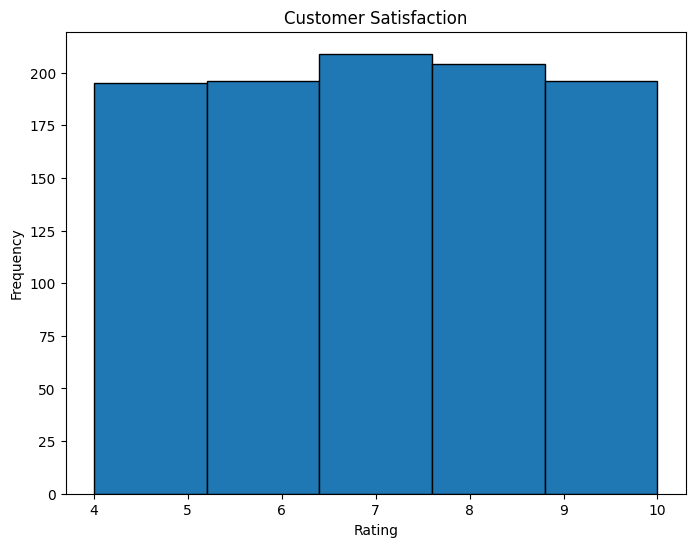

In [67]:
import matplotlib.pyplot as plt # Corrected module name
plt.figure(figsize=(8,6))
plt.hist(df['Rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Customer Satisfaction')
plt.show() # Call the show function to display the plot

# 13- Customer Satisfaction by Location (Branch,City)

In [68]:
df.groupby(['Branch'])['Rating'].mean()

Branch
Helioples      7.027059
mamoura        7.072866
zouni beach    6.818072
Name: Rating, dtype: float64

In [70]:
df.groupby(['City'])['Rating'].mean()

City
Alex     7.072866
Cairo    7.027059
Gouna    6.818072
Name: Rating, dtype: float64

## 14- Customer Satisfaction by Demographics (Gender,customer type)

In [72]:
df.groupby(['Gender'])['Rating'].mean()

Gender
Female    6.964471
Male      6.980962
Name: Rating, dtype: float64

In [74]:
df.groupby(['Customer type'])['Rating'].mean()

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64

# 15-Customer Satisfaction by Product (Product line, gender,customer type)

In [76]:
df.groupby(['Product line'])['Rating'].mean()

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

In [78]:
df.groupby(['Gender','Product line'])['Rating'].mean()

Gender  Product line          
Female  Electronic accessories    6.786905
        Fashion accessories       7.120833
        Food and beverages        7.203333
        Health and beauty         7.146875
        Home and lifestyle        6.763291
        Sports and travel         6.767045
Male    Electronic accessories    7.059302
        Fashion accessories       6.921951
        Food and beverages        7.016667
        Health and beauty         6.898864
        Home and lifestyle        6.909877
        Sports and travel         7.084615
Name: Rating, dtype: float64

In [80]:
df.groupby(['Customer type','Product line'])['Rating'].mean()

Customer type  Product line          
Member         Electronic accessories    6.950000
               Fashion accessories       6.946512
               Food and beverages        6.996809
               Health and beauty         7.078082
               Home and lifestyle        6.868675
               Sports and travel         6.817241
Normal         Electronic accessories    6.903261
               Fashion accessories       7.106522
               Food and beverages        7.250000
               Health and beauty         6.934177
               Home and lifestyle        6.803896
               Sports and travel         7.025316
Name: Rating, dtype: float64

# 16-Customer Satisfaction by Payment Method(payment,Branch,Product line)

In [82]:
df.groupby(['Payment'])['Rating'].mean()

Payment
Cash           6.970058
Credit card    7.003215
Ewallet        6.947826
Name: Rating, dtype: float64

In [84]:
df.groupby(['Branch','Payment'])['Rating'].mean()

Branch       Payment    
Helioples    Cash           6.938182
             Credit card    6.985577
             Ewallet        7.138889
mamoura      Cash           6.973387
             Credit card    7.291837
             Ewallet        6.986792
zouni beach  Cash           6.998182
             Credit card    6.760550
             Ewallet        6.698230
Name: Rating, dtype: float64

In [86]:
df.groupby(['Payment','Product line'])['Rating'].mean()

Payment      Product line          
Cash         Electronic accessories    6.930986
             Fashion accessories       6.996491
             Food and beverages        7.338596
             Health and beauty         7.228571
             Home and lifestyle        6.452941
             Sports and travel         6.867797
Credit card  Electronic accessories    7.184783
             Fashion accessories       6.880357
             Food and beverages        7.208197
             Health and beauty         6.870000
             Home and lifestyle        6.782222
             Sports and travel         7.052830
Ewallet      Electronic accessories    6.690566
             Fashion accessories       7.186154
             Food and beverages        6.780357
             Health and beauty         6.920755
             Home and lifestyle        7.182812
             Sports and travel         6.835185
Name: Rating, dtype: float64

# 17- Customer Satisfaction by Date (Date, Branch ,Product Line)

In [88]:
df.groupby(['Year','Month'])['Rating'].mean()

Year  Month
2019  1        7.017614
      2        7.071287
      3        6.840290
Name: Rating, dtype: float64

In [90]:
df.groupby(['Branch','Year','Month'])['Rating'].mean()

Branch       Year  Month
Helioples    2019  1        7.078151
                   2        7.007447
                   3        6.993701
mamoura      2019  1        7.154918
                   2        7.200000
                   3        6.858491
zouni beach  2019  1        6.801802
                   2        7.008257
                   3        6.649107
Name: Rating, dtype: float64

In [92]:
df.groupby(['Year','Month','Product line'])['Rating'].mean()

Year  Month  Product line          
2019  1      Electronic accessories    7.142593
             Fashion accessories       7.060937
             Food and beverages        7.405357
             Health and beauty         7.128571
             Home and lifestyle        6.672881
             Sports and travel         6.784286
      2      Electronic accessories    6.964815
             Fashion accessories       7.081667
             Food and beverages        7.012903
             Health and beauty         7.206522
             Home and lifestyle        7.071053
             Sports and travel         7.130233
      3      Electronic accessories    6.700000
             Fashion accessories       6.933333
             Food and beverages        6.932143
             Health and beauty         6.731579
             Home and lifestyle        6.850794
             Sports and travel         6.916981
Name: Rating, dtype: float64

# 18-Customer Satisfaction by Working Hours (Time, Branch ,Product Line)

In [94]:
df.groupby(['hour'])['Rating'].mean()

hour
10    7.098020
11    6.806667
12    7.300000
13    7.030097
14    6.934940
15    6.876471
16    6.859740
17    6.939189
18    7.187097
19    6.716814
20    6.977333
Name: Rating, dtype: float64

In [96]:
df.groupby(['hour','Branch'])['Rating'].mean()

hour  Branch     
10    Helioples      7.157895
      mamoura        7.164865
      zouni beach    6.915385
11    Helioples      6.840000
      mamoura        6.654545
      zouni beach    6.872727
12    Helioples      7.163636
      mamoura        7.367742
      zouni beach    7.396000
13    Helioples      7.300000
      mamoura        7.135294
      zouni beach    6.715789
14    Helioples      7.000000
      mamoura        7.039286
      zouni beach    6.783333
15    Helioples      7.245946
      mamoura        6.736364
      zouni beach    6.593750
16    Helioples      6.718750
      mamoura        7.139286
      zouni beach    6.664706
17    Helioples      6.840741
      mamoura        7.185185
      zouni beach    6.740000
18    Helioples      7.318182
      mamoura        7.312000
      zouni beach    6.974286
19    Helioples      6.851852
      mamoura        6.841667
      zouni beach    6.554000
20    Helioples      6.627273
      mamoura        7.222222
      zouni beach    7

In [98]:
df.groupby(['hour','Product line'])['Rating'].mean()

hour  Product line          
10    Electronic accessories    7.564706
      Fashion accessories       7.064286
      Food and beverages        7.465000
      Health and beauty         6.958824
      Home and lifestyle        6.761111
                                  ...   
20    Fashion accessories       7.100000
      Food and beverages        7.340000
      Health and beauty         6.764286
      Home and lifestyle        6.360000
      Sports and travel         6.925000
Name: Rating, Length: 66, dtype: float64

# **19- which branch have highest gross income , how and how can other branches do that?**

# **Quetion 1** - which branch have the highest gross income ?

In [100]:
df.groupby(['Branch'])['gross income'].sum()

Branch
Helioples      5057.1605
mamoura        5265.1765
zouni beach    5057.0320
Name: gross income, dtype: float64

In [101]:
df.groupby(['Product line','Branch'])['gross income'].sum()

Product line            Branch     
Electronic accessories  Helioples       872.2435
                        mamoura         903.2845
                        zouni beach     811.9735
Fashion accessories     Helioples       777.7385
                        mamoura        1026.6700
                        zouni beach     781.5865
Food and beverages      Helioples       817.2905
                        mamoura        1131.7550
                        zouni beach     724.5185
Health and beauty       Helioples       599.8930
                        mamoura         791.2060
                        zouni beach     951.4600
Home and lifestyle      Helioples      1067.4855
                        mamoura         661.6930
                        zouni beach     835.6745
Sports and travel       Helioples       922.5095
                        mamoura         750.5680
                        zouni beach     951.8190
Name: gross income, dtype: float64

# **Answer 1**- mamoura branch is the highest gross income more than other branches.

# **Quetion 2**- How the mamoura branch do that ?

# Rating view

In [102]:
df.groupby(['Branch'])['Rating'].mean()

Branch
Helioples      7.027059
mamoura        7.072866
zouni beach    6.818072
Name: Rating, dtype: float64

In [103]:
df.groupby(['Product line','Branch'])['Rating'].mean()

Product line            Branch     
Electronic accessories  Helioples      6.911667
                        mamoura        6.747273
                        zouni beach    7.116364
Fashion accessories     Helioples      6.878431
                        mamoura        7.440000
                        zouni beach    6.722581
Food and beverages      Helioples      7.253448
                        mamoura        7.080303
                        zouni beach    6.994000
Health and beauty       Helioples      6.900000
                        mamoura        6.998077
                        zouni beach    7.100000
Home and lifestyle      Helioples      6.930769
                        mamoura        7.060000
                        zouni beach    6.516000
Sports and travel       Helioples      7.257627
                        mamoura        7.028889
                        zouni beach    6.509677
Name: Rating, dtype: float64

**Mamoura branch have the highest customers satisaction rate more than other branches at (Fashion accessories - Home & lifstyle ) product lines**

# Payment methods View

In [104]:
df.groupby(['Product line','Branch','Payment'])['gross income'].sum()

Product line            Branch       Payment    
Electronic accessories  Helioples    Cash           198.4045
                                     Credit card    363.4565
                                     Ewallet        310.3825
                        mamoura      Cash           459.3790
                                     Credit card    133.3785
                                     Ewallet        310.5270
                        zouni beach  Cash           329.3585
                                     Credit card    237.8325
                                     Ewallet        244.7825
Fashion accessories     Helioples    Cash           204.1670
                                     Credit card    249.7790
                                     Ewallet        323.7925
                        mamoura      Cash           365.1940
                                     Credit card    288.5925
                                     Ewallet        372.8835
                        zouni beach 

**Mamoura branch have the highest gross income from cash more than other branches at (Fashion accessories - Electronic accessories- Food & beverages ) product line**

# Demographics View

In [105]:
df.groupby(['Gender'])['gross income'].sum()

Gender
Female    7994.425
Male      7384.944
Name: gross income, dtype: float64

In [106]:
df.groupby(['Gender','Branch'])['gross income'].sum()

Gender  Branch     
Female  Helioples      2536.6270
        mamoura        2937.4030
        zouni beach    2520.3950
Male    Helioples      2520.5335
        mamoura        2327.7735
        zouni beach    2536.6370
Name: gross income, dtype: float64

In [107]:
df.groupby(['Gender','Product line'])['gross income'].sum()

Gender  Product line          
Female  Electronic accessories    1290.5725
        Fashion accessories       1449.4000
        Food and beverages        1579.5675
        Health and beauty          883.8565
        Home and lifestyle        1430.3275
        Sports and travel         1360.7010
Male    Electronic accessories    1296.9290
        Fashion accessories       1136.5950
        Food and beverages        1093.9965
        Health and beauty         1458.7025
        Home and lifestyle        1134.5255
        Sports and travel         1264.1955
Name: gross income, dtype: float64

In [108]:
df.groupby(['Gender','Branch','Product line'])['gross income'].sum()

Gender  Branch       Product line          
Female  Helioples    Electronic accessories    474.5855
                     Fashion accessories       468.3915
                     Food and beverages        333.3220
                     Health and beauty         272.1380
                     Home and lifestyle        601.7530
                     Sports and travel         386.4370
        mamoura      Electronic accessories    427.1055
                     Fashion accessories       548.5565
                     Food and beverages        745.7695
                     Health and beauty         306.9400
                     Home and lifestyle        373.4730
                     Sports and travel         535.5585
        zouni beach  Electronic accessories    388.8815
                     Fashion accessories       432.4520
                     Food and beverages        500.4760
                     Health and beauty         304.7785
                     Home and lifestyle        455.1015
    

**Mamoura branch have the highest gross income from Female more than other branches at (Fashion accessories - Sports and travel- Food & beverages ) product line .**

# **Answer 2** **mamoura branch is the Highest gross income more than other branches because of :**
A- **Mamoura branch have the highest customers satisaction rate more than other branches at (Fashion accessories - Home & lifstyle ) product lines**
**B- Mamoura branch have the highest gross income from cash more than other branches at (Fashion accessories - Electronic accessories- Food & beverages ) product line .** **C-Mamoura branch have the highest gross income from Female more than other branches at (Fashion accessories - Sports and travel- Food & beverages ) product line .**

# **Quetion3 : what is the other branches should do to increase its gross income ?**

# Answer 3 :other branches can increase its gross income by do spent more investment in (Female Fashion -Sports and travel- Home&lifstyle) product lines to increase female satisaction rate , create more contracts with local banks for provide ATM machines near branches to provide more cash to customers , Launch marketing offers on cash payments ,

In [109]:
df.to_excel('Supermarket_Cleaned_Data.xlsx')